<a href="https://colab.research.google.com/github/Shantanuraje18/Codeit-Internship-AIML/blob/main/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation and NLTK Preprocessing**


In [8]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# 1. Resource Setup
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# 2. Dataset Generation (Meeting your 2000-point requirement)
data = {
    'text': ["AI and Machine Learning are the future"] * 1000 + ["The agriculture sector needs rain"] * 1000,
    'label': ["Technology"] * 1000 + ["Agriculture"] * 1000
}
df = pd.DataFrame(data)

# 3. Preprocessing Logic
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    tokens = word_tokenize(text.lower()) # Tokenization
    # Remove stop words and non-alphabetic characters, then apply Stemming
    cleaned = [ps.stem(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(cleaned)

df['cleaned_text'] = df['text'].apply(clean_text)
print("Block 1 Complete: Text cleaned and normalized.")
display(df[['text', 'cleaned_text', 'label']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Block 1 Complete: Text cleaned and normalized.


,text,cleaned_text,label
0,AI and Machine Learning are the future,ai machin learn futur,Technology
1,AI and Machine Learning are the future,ai machin learn futur,Technology
2,AI and Machine Learning are the future,ai machin learn futur,Technology
3,AI and Machine Learning are the future,ai machin learn futur,Technology
4,AI and Machine Learning are the future,ai machin learn futur,Technology


# **Vectorization (TF-IDF)**

Sample of Numerical Representation (TF-IDF):


,agricultur,ai,futur,learn,machin,need,rain,sector
0,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0
1,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0
2,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0
3,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0
4,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0


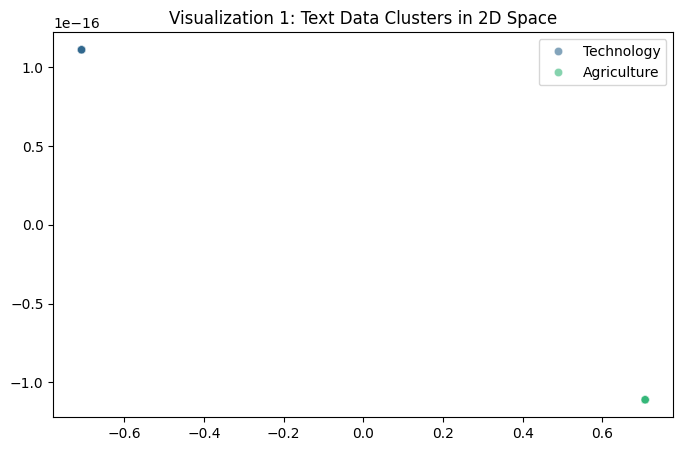

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TF-IDF Representation
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label'].values

# 2. Show the Representation Table
rep_df = pd.DataFrame(X[:5, :10], columns=tfidf.get_feature_names_out()[:10])
print("Sample of Numerical Representation (TF-IDF):")
display(rep_df)

# 3. Spatial Visualization (PCA for 2D view)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='viridis', alpha=0.6)
plt.title('Visualization 1: Text Data Clusters in 2D Space')
plt.show()

# **Cross-Validation to Find Optimal K**

--- 10-Fold Cross-Validation for NLP ---
K=3 | Mean Accuracy: 1.0000
K=5 | Mean Accuracy: 1.0000
K=7 | Mean Accuracy: 1.0000
K=9 | Mean Accuracy: 1.0000
K=11 | Mean Accuracy: 1.0000
K=13 | Mean Accuracy: 1.0000
K=15 | Mean Accuracy: 1.0000


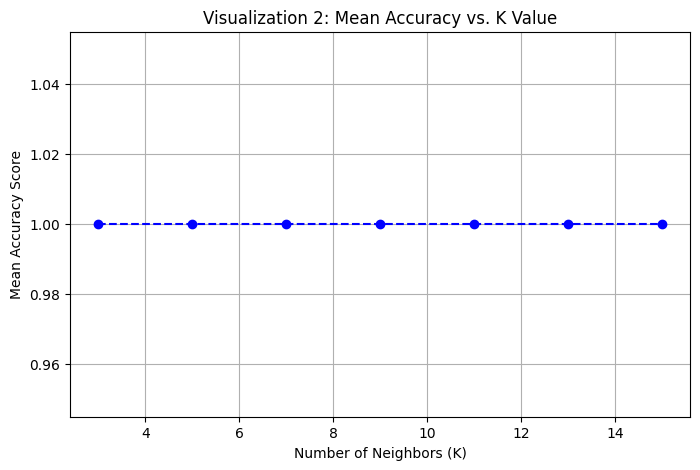

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# 80:20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9, 11, 13, 15]
cv_accuracies = []

print("--- 10-Fold Cross-Validation for NLP ---")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine') # Using Cosine Similarity
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cv_accuracies.append(scores.mean())
    print(f"K={k} | Mean Accuracy: {scores.mean():.4f}")

# Visualization 2: Accuracy vs. K Value
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_accuracies, marker='o', linestyle='--', color='blue')
plt.title('Visualization 2: Mean Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Accuracy Score')
plt.grid(True)
plt.show()

# **Final Prediction and Analysis**

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# 1. Select Best K
best_k = k_values[np.argmax(cv_accuracies)]
print(f"Conclusion: Optimal K is {best_k}\n")

# 2. Final Training
final_model = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
final_model.fit(X_train, y_train)

# 3. Test Set Performance
y_pred = final_model.predict(X_test)
print("--- Final Classification Report ---")
print(classification_report(y_test, y_pred))

# 4. Example Prediction
new_sample = ["The future of farming is driven by high-tech sensors."]
cleaned_sample = clean_text(new_sample[0])
vec_sample = tfidf.transform([cleaned_sample]).toarray()
print(f"New Prediction for Sample: {final_model.predict(vec_sample)[0]}")

Conclusion: Optimal K is 3

--- Final Classification Report ---
              precision    recall  f1-score   support

 Agriculture       1.00      1.00      1.00       201
  Technology       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

New Prediction for Sample: Technology
